# THE SPARKS FOUNDATION
## TASK 4 : COMPUTER VISION AND IoT

## Color Identification in Images: Implement an image color detector which identifies all the colors in an image or video

### By SUPARNA SARKAR

**Importing the libraries**

In [1]:
import os
import warnings
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from collections import Counter
import cv2

%matplotlib inline

**Reading an image**

In [2]:
def read_n_get_image(file_path):
    image = cv2.imread(file_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

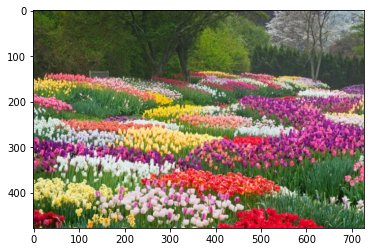

In [3]:
image = read_n_get_image("1.jpg")
plt.imshow(image)

**Resizing the image**

In [4]:
# Resizing of image is done so that KMeans does not take too much time to return the prominent colors
image = cv2.resize(image, (500, 500))

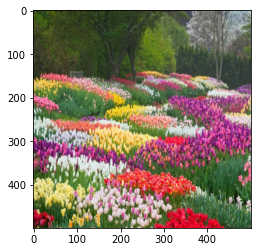

In [5]:
# Show the image after resizing
plt.imshow(image)

**Creating the matrix of features for K-Means Algorithm**

In [6]:
print(type(image))
print(image)
print(image.shape)

<class 'numpy.ndarray'>
[[[ 25  50  28]
  [ 24  51  22]
  [ 29  57  15]
  ...
  [175 198 211]
  [180 203 219]
  [183 206 224]]

 [[ 22  48  25]
  [ 26  52  21]
  [ 41  68  26]
  ...
  [175 199 211]
  [183 206 220]
  [186 209 226]]

 [[ 18  42  16]
  [ 27  53  19]
  [ 58  83  40]
  ...
  [179 201 214]
  [186 208 222]
  [186 207 224]]

 ...

 [[152   1  20]
  [135  12  17]
  [ 92  28  13]
  ...
  [ 62  91  49]
  [ 68  96  53]
  [ 53  81  36]]

 [[137   1  18]
  [125  13  17]
  [ 83  29  12]
  ...
  [ 50  87  44]
  [ 47  85  41]
  [ 42  80  33]]

 [[130   0  17]
  [117  10  14]
  [ 78  29  10]
  ...
  [ 55  97  53]
  [ 43  85  40]
  [ 34  76  30]]]
(500, 500, 3)


In [7]:
# x is the matrix of features to be supplied to the KMeans Algorithm
x = image.reshape(image.shape[0]*image.shape[1],3)

In [8]:
print(x)

[[25 50 28]
 [24 51 22]
 [29 57 15]
 ...
 [55 97 53]
 [43 85 40]
 [34 76 30]]


**Building the KMeans Clustering Model to find out the top five prominent colors in the model**

In [9]:
kmeans = KMeans(n_clusters=5)

In [10]:
kmeans.fit(x)

KMeans(n_clusters=5)

In [11]:
prominent_colors = kmeans.cluster_centers_
prominent_colors = prominent_colors.astype(int)
print(prominent_colors)

[[100 113  72]
 [197 148 124]
 [ 56  71  40]
 [219 208 193]
 [177  54  93]]


Text(0.5, 1.0, 'Prominent Colors')

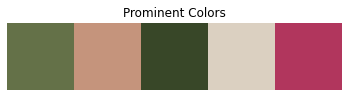

In [12]:
plt.imshow([prominent_colors])
plt.axis('off')
plt.title("Prominent Colors")

**Getting the ordering of prominency among the colors**

In [13]:
# Get the number of pixels participating in each cluster
intensity_list = Counter(kmeans.labels_)
print(intensity_list)

Counter({2: 85981, 0: 60809, 1: 40704, 4: 31947, 3: 30559})


In [14]:
keys = list(intensity_list.keys())
values = list(intensity_list.values())
print(keys)
print(values)

[2, 0, 1, 3, 4]
[85981, 60809, 40704, 30559, 31947]


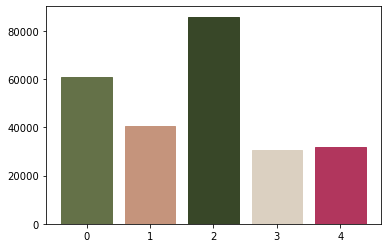

In [15]:
# Show the prominency levels on a bar graph
bar_graph = plt.bar(keys,values)
for x in range(0, len(prominent_colors)):
    bar_graph[x].set_color(prominent_colors[keys[x]].astype(float)/255.0)
plt.show(bar_graph)